# Implementation of Multiplication by a Quantum Fourier Transform

In [30]:
import numpy as np
import qiskit as qi
import qiskit.quantum_info as quantum_info
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT


In [31]:
def swap_registers(circ, n):
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    return circ

In [46]:
def A(qubits):
    qFTa = QuantumCircuit(qubits)
    qFTa = qFTa.compose(QFT(qubits, inverse = False), np.arange(0,qubits,1))
    #swap_registers(qFTa, 3)
    ind = (qubits//2) - 1
    for i in range(ind):
        par = -2*np.pi/2**(i+1)
        qFTa.cp(par, i, i+3)
        qFTa.barrier()
    #swap_registers(qFTa, 3)
    qFTa = qFTa.compose(QFT(qubits, inverse=True), np.arange(0, qubits, 1))
    return qFTa

In [45]:
def S(qubits):
    qFTa = QuantumCircuit(qubits)
    qFTa = qFTa.compose(QFT(qubits, inverse = False), np.arange(0,qubits,1))
    #swap_registers(qFTa, 3)
    ind = (qubits//2) - 1
    for i in range(ind+1):
        par = -2*np.pi/2**(i+1)
        qFTa.cp(par, i, i+3)
        qFTa.barrier()
    #swap_registers(qFTa, 3)
    qFTa = qFTa.compose(QFT(qubits, inverse=True), np.arange(0, qubits, 1))
    return qFTa

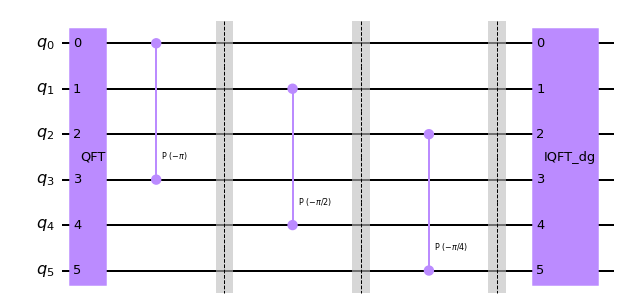

In [47]:
A(6).draw('mpl')
S(6).draw('mpl')

In [52]:
def mult(y, qubits):
    qFTa = QuantumCircuit(4*qubits)
    qFTa = qFTa.compose(QFT(qubits, inverse = False), np.arange(0,qubits,1))

    for i in range(qubits):
        par = 2*np.pi*y/2**(i+1)
        qFTa.cp(par, 1, i)
        qFTa.barrier()
    swap_registers(qFTa, 3)
    qFTa = qFTa.compose(QFT(qubits, inverse=True), np.arange(0, qubits, 1))
    return qFTa

In [65]:
state = quantum_info.Statevector.from_label('100100100')
state.draw(output = 'latex')

<IPython.core.display.Latex object>

In [66]:
def cmod15(a, p):
    if a not in [2,4,7,8,11,13]:
        raise ValueError(" a must be 2, 4, 7, 8, 11 or 13")
    U = QuantumCircuit(4)
    for i in range(p):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4,11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{p} mod 15"
    cU = U.control()
    return cU

In [67]:
def qFTin(n):
    circ = QuantumCircuit(n)
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cp(-np.pi/float(2**(j-m)), m, j)
        circ.h(j)
    circ.name = "qFT inverse"
    return circ


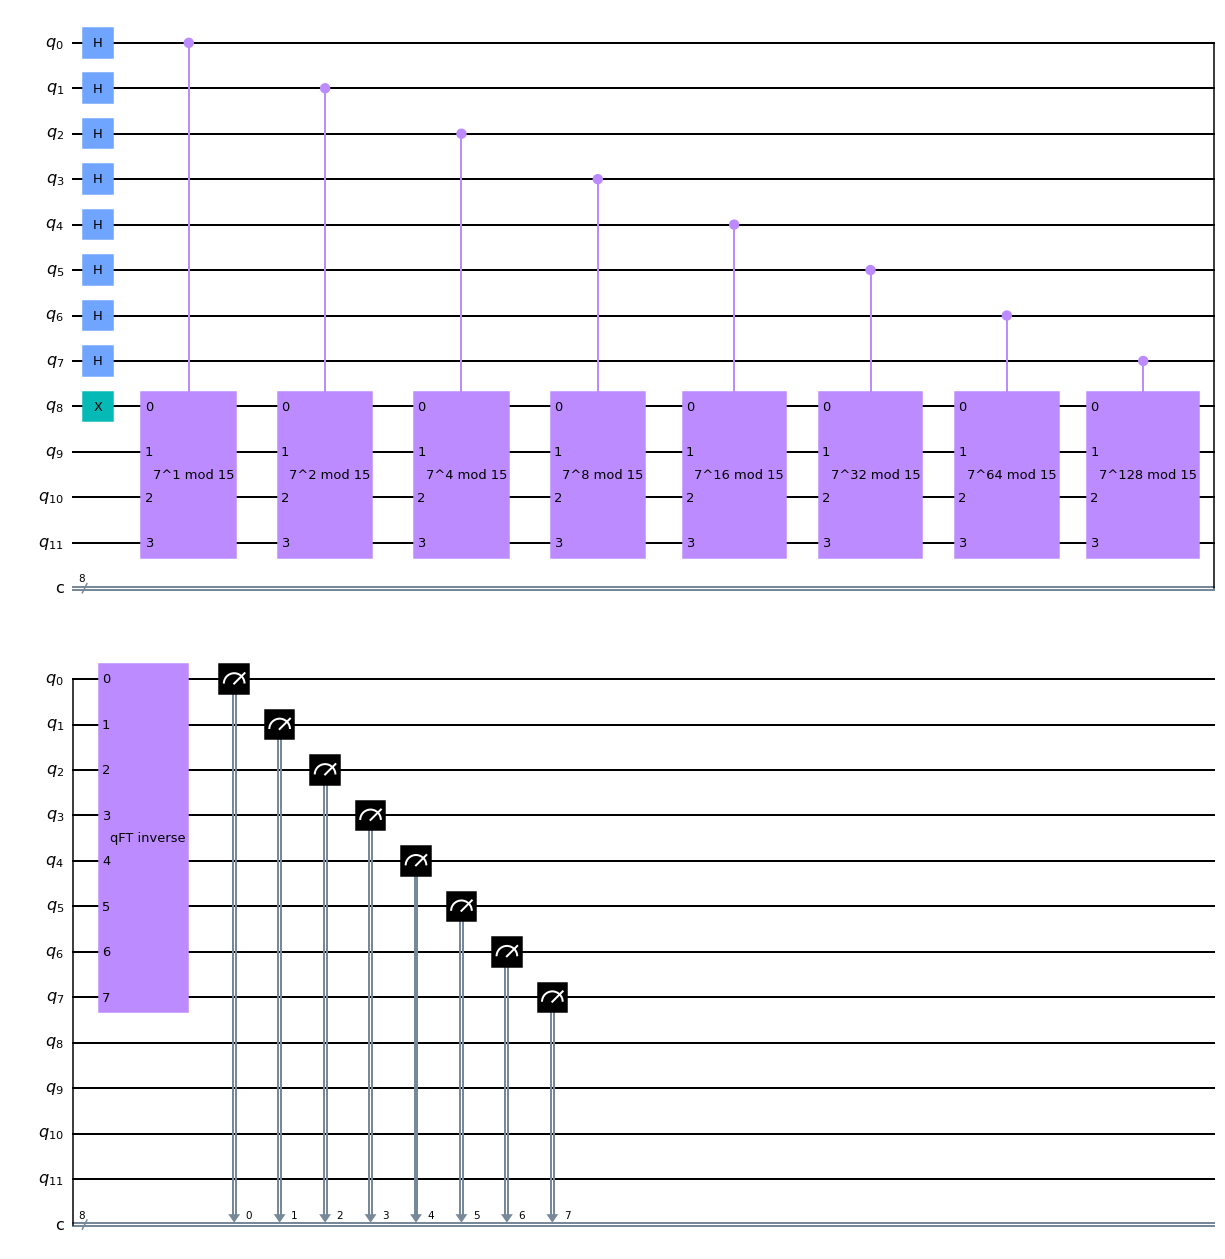

In [69]:
N = 8
a = 7

circuit = QuantumCircuit(N + 4, N)

for q in range(N):
    circuit.h(q)

circuit.x(N)

for q in range(N):
    circuit.append(cmod15(a,2**q),
                   [q] + [i+N for i in range(4)])
    
circuit.append(qFTin(N), range(N))

circuit.measure(range(N), range(N))
circuit.draw('mpl')